In [225]:
import warnings
warnings.filterwarnings('ignore')

In [226]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the data set

In [227]:
cars_data = pd.read_csv('CarPrice_Assignment.csv')
cars_data.shape

(205, 26)

In [228]:
cars_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Data Cleaning
    - Check for Null values and impute/drop
    - Check for duplicates

In [229]:
#Check for null %
cars_data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

- There are no null records in any of the columns, so no records need to be dropped/imputed

In [230]:
#drop duplicate records if any
cars_data.drop_duplicates(inplace=True)
cars_data.shape

(205, 26)

- All records remained intact, so no duplicates were found

In [231]:
cars_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Data Preparation - I
    - Convert data to appropriate data types
    - Derive new values to get more meaningful insights

In [232]:
cars_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [233]:
#help(pd.Series.str.split)

In [234]:
#As mentioned in the Assignmeent, carName comprises of car name and the manufacturer. Lets split this and store car name and manufacturer in separate columns
cars_data['carcompany'] = cars_data['CarName'].str.split(' ').str[0]
cars_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carcompany
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [235]:
#lets drop this column carName as we will not be using it in our modelling
cars_data.drop(['CarName'],axis=1,inplace=True)
cars_data.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carcompany
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [236]:
#Lets take a look at the newly derived car_company attribute's values
cars_data.carcompany.value_counts()

toyota         31
nissan         17
mazda          15
mitsubishi     13
honda          13
subaru         12
peugeot        11
volvo          11
dodge           9
volkswagen      9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
porsche         4
isuzu           4
chevrolet       3
jaguar          3
alfa-romero     3
vw              2
renault         2
maxda           2
Nissan          1
mercury         1
porcshce        1
vokswagen       1
toyouta         1
Name: carcompany, dtype: int64

- As we see above, there are some company names which are misspelt in some records or coded with initals
    - toyota & toyouta are same - TOYOTA
    - Nissan & nissan are same - NISSAN
    - mazda & maxda are same - MAZDA
    - volkswagen, vw & vokswagen are same - VOLKSWAGEN
    - prosche & porcshce are same - PORSCHE
    
    Lets standardize these values and use common names and store in common case may ve Initial letter capital

In [237]:
#correcting the misspelt company names
#cars_data[['carcompany']] = 
cars_data['carcompany'] = cars_data['carcompany'].replace({'toyouta':'toyota','maxda':'mazda','vw':'volkswagen','vokswagen':'volkswagen','porcshce':'porsche'})

#Intial letter capitalize for car company names
cars_data['carcompany'] = cars_data['carcompany'].apply(lambda x: x.capitalize())
cars_data.carcompany.unique()


array(['Alfa-romero', 'Audi', 'Bmw', 'Chevrolet', 'Dodge', 'Honda',
       'Isuzu', 'Jaguar', 'Mazda', 'Buick', 'Mercury', 'Mitsubishi',
       'Nissan', 'Peugeot', 'Plymouth', 'Porsche', 'Renault', 'Saab',
       'Subaru', 'Toyota', 'Volkswagen', 'Volvo'], dtype=object)

In [238]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg       

In [239]:
#we have the following categorical variables potential for replacement by dummy values
cars_data[['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem','carcompany']].head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,carcompany
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi,Alfa-romero
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi,Alfa-romero
2,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,Alfa-romero
3,gas,std,four,sedan,fwd,front,ohc,four,mpfi,Audi
4,gas,std,four,sedan,4wd,front,ohc,five,mpfi,Audi


In [240]:
#doornumber & cylindernumber seem to be ordinal values but stored as verbiage like two instead of 2. 
#We can replace these with numbers & convert to numeric type
cars_data.doornumber.unique()

array(['two', 'four'], dtype=object)

In [241]:
cars_data['doornumber']=cars_data['doornumber'].replace({'two':2,'four':4}).astype('int')
cars_data.doornumber.unique()

array([2, 4], dtype=int64)

In [242]:
#Lets do the same for cylindernumber
cars_data.cylindernumber.unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [243]:
cars_data['cylindernumber']=cars_data['cylindernumber'].replace({'two':2,'three':3,'four':4,'five':5,'six':6,'eight':8,'twelve':12}).astype('int')
cars_data.cylindernumber.unique()

array([ 4,  6,  5,  3, 12,  2,  8], dtype=int64)

In [244]:
#we have the following categorical variables potential for replacement by dummy values
cars_data[['fueltype','aspiration','carbody','drivewheel','enginelocation','enginetype','fuelsystem']].head()

,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem
0,gas,std,convertible,rwd,front,dohc,mpfi
1,gas,std,convertible,rwd,front,dohc,mpfi
2,gas,std,hatchback,rwd,front,ohcv,mpfi
3,gas,std,sedan,fwd,front,ohc,mpfi
4,gas,std,sedan,4wd,front,ohc,mpfi


- We still have a few categorical string variables. We cannot use these as it is in our model building, we would need to encode these appropriately in numeric format.
- Before we do that, lets analyze a few of these parameters.

## Exploratory Data Analysis

In [245]:
#sns.pairplot(data=cars_data_temp,y_vars=cars_data_temp, x_vars=cars_data_temp.price)
#plt.show()

In [246]:
cars_data.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carcompany
0,1,3,gas,std,2,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,Alfa-romero
1,2,3,gas,std,2,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,Alfa-romero
2,3,1,gas,std,2,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,Alfa-romero
3,4,2,gas,std,4,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,Audi
4,5,2,gas,std,4,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,Audi


- car_ID column is just a unique identifier for every record and hence would not be of influence in our analysis and model building, so this can be dropped

In [247]:
cars_data.drop(['car_ID'],axis=1,inplace=True)

In [248]:
cars_data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carcompany
0,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,Alfa-romero
1,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,Alfa-romero
2,1,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,Alfa-romero
3,2,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,Audi
4,2,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,Audi


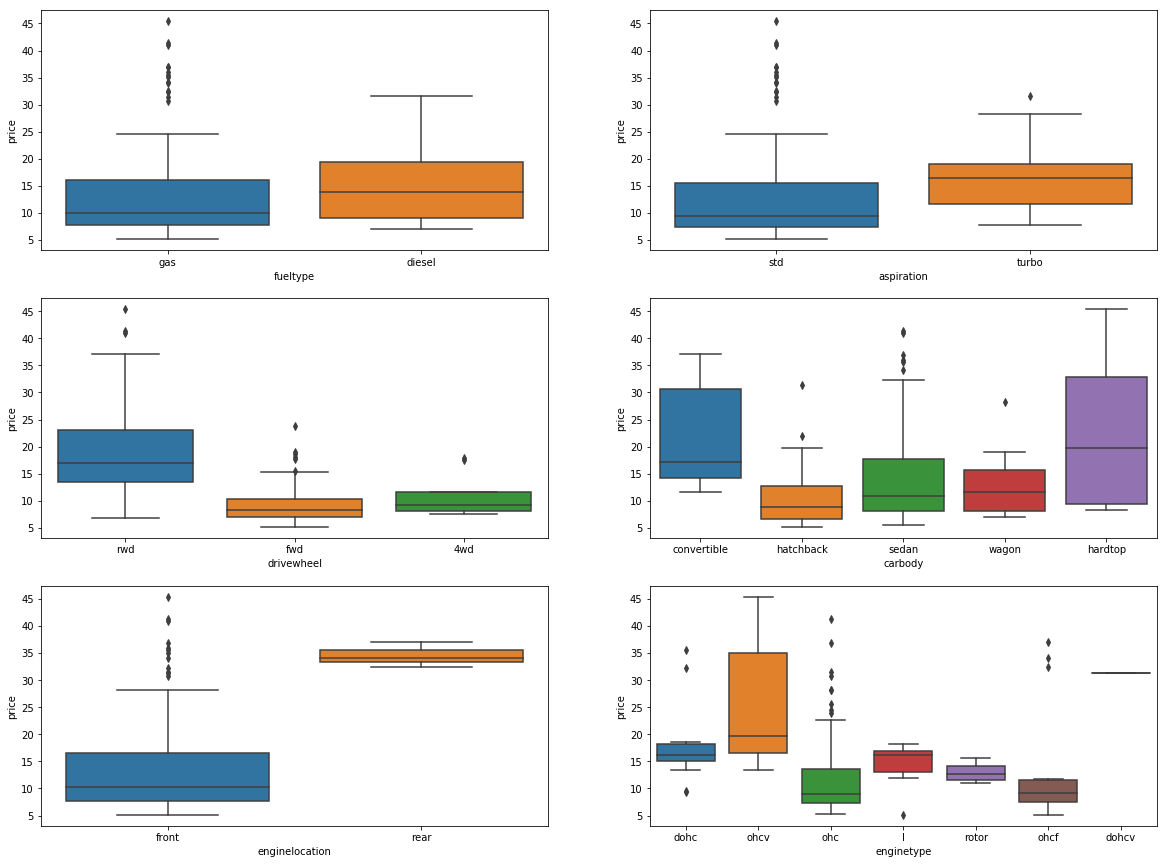

In [249]:
plt.figure(figsize=(20,15))
plt.subplot(3,2,1)
sns.boxplot(y=cars_data.price/1000,x='fueltype',data=cars_data)

plt.subplot(3,2,2)
sns.boxplot(y=cars_data.price/1000,x='aspiration',data=cars_data)

plt.subplot(3,2,3)
sns.boxplot(y=cars_data.price/1000,x='drivewheel',data=cars_data)

plt.subplot(3,2,4)
sns.boxplot(y=cars_data.price/1000,x='carbody',data=cars_data)

plt.subplot(3,2,5)
sns.boxplot(y=cars_data.price/1000,x='enginelocation',data=cars_data)

plt.subplot(3,2,6)
sns.boxplot(y=cars_data.price/1000,x='enginetype',data=cars_data)
plt .show()

- As it is evident from above, enginelocation has a strong corretion with price. Other categorical variables also impact the price, but they might show more effect in presence of some other variables. We will check that as well during model building.

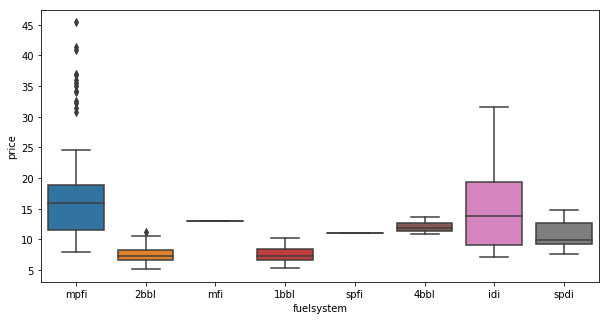

In [250]:
plt.figure(figsize=(10,5))
sns.boxplot(y=cars_data.price/1000,x='fuelsystem',data=cars_data)

plt.show()

- Fuelsystem might be an influencing factor in conjustion with some other variable, but indepedently, it doesn't seem to be very strongly driving the car pricing. We will analyze its correlation with other variables in a while

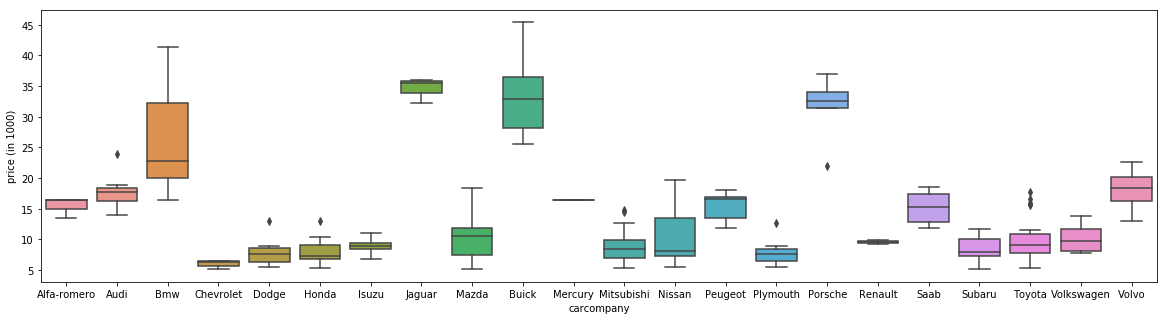

In [251]:

plt.figure(figsize=(20,5))
sns.boxplot(y=cars_data.price/1000,x='carcompany',data=cars_data)
plt.ylabel('price (in 1000)')

plt.show()

- Car companies do seem to have an imapact on the price. As we see from above, companies like Bmw, Buick, Porsche, jaguar are quite premium brands and have a consistently higher price than other companies

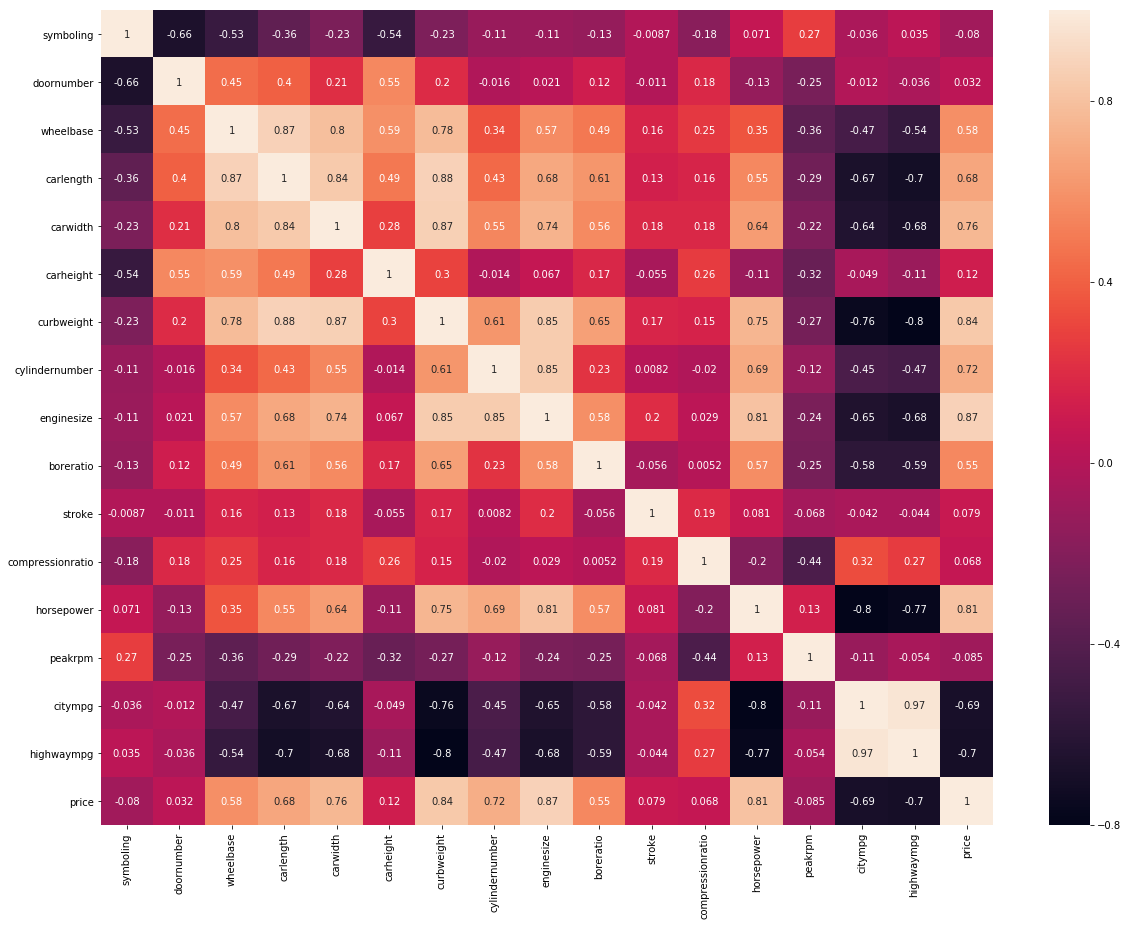

In [252]:
plt.figure(figsize=(20,15))
sns.heatmap(cars_data.corr(),annot=True)

- As we see in the heat map above A lot of variables are highly correlated with the price variable
    - Variable like highwaympg, citympg are highly negatively correlated with price
    - Variables like horsepower, enginesize, cylindernumber, curbweight, carwidth are highly positively correlated (>0.7)
      Also boreratio, carlength, wheelbase show a high positive correlation (>0.5)
    - So these variables definitely influence the car prices
- We can also see that above correlated vaiables are also hoghly correlated to each other
    - Like highwaympg and citympg hav correaltion factor of 0.97
    - horsepower is correalted to cylindernumber, boreratio and enginesize etc.
- We need to account for this high correlation among the independent variables when building our model as this might lead to multicollinearity and hence influence the model accuracy

## Data Preparation - II
- For Model building, we will need to convert the categorical variables to numeric values. We can do that by generating dummy variables for each attribute that would have binary values either 0 or 1
- Number of dummy columns for an attribute = number of unique values of the attribute - 1

In [253]:
cars_data_temp = cars_data.copy(deep=True)

In [254]:
#Before converting to dummies, appending column name so that dummy columns will be easily identifiable

In [255]:
cars_data_temp['fueltype'] = cars_data_temp['fueltype'].apply(lambda x: 'fueltype_'+ x)
cars_data_temp['aspiration'] = cars_data_temp['aspiration'].apply(lambda x: 'aspiration_'+ x)
cars_data_temp['carbody'] = cars_data_temp['carbody'].apply(lambda x: 'carbody_'+ x)
cars_data_temp['drivewheel'] = cars_data_temp['drivewheel'].apply(lambda x: 'drivewheel_'+ x)
cars_data_temp['enginelocation'] = cars_data_temp['enginelocation'].apply(lambda x: 'enginelocation_'+ x)
cars_data_temp['enginetype'] = cars_data_temp['enginetype'].apply(lambda x: 'enginetype_'+ x)
cars_data_temp['fuelsystem'] = cars_data_temp['fuelsystem'].apply(lambda x: 'fuelsystem_'+ x)
cars_data_temp['carcompany'] = cars_data_temp['carcompany'].apply(lambda x: 'carcompany_'+ x)

cars_data_temp[['fueltype','aspiration','carbody','drivewheel','enginelocation','enginetype','fuelsystem','carcompany']].head()

,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem,carcompany
0,fueltype_gas,aspiration_std,carbody_convertible,drivewheel_rwd,enginelocation_front,enginetype_dohc,fuelsystem_mpfi,carcompany_Alfa-romero
1,fueltype_gas,aspiration_std,carbody_convertible,drivewheel_rwd,enginelocation_front,enginetype_dohc,fuelsystem_mpfi,carcompany_Alfa-romero
2,fueltype_gas,aspiration_std,carbody_hatchback,drivewheel_rwd,enginelocation_front,enginetype_ohcv,fuelsystem_mpfi,carcompany_Alfa-romero
3,fueltype_gas,aspiration_std,carbody_sedan,drivewheel_fwd,enginelocation_front,enginetype_ohc,fuelsystem_mpfi,carcompany_Audi
4,fueltype_gas,aspiration_std,carbody_sedan,drivewheel_4wd,enginelocation_front,enginetype_ohc,fuelsystem_mpfi,carcompany_Audi


In [256]:
cars_data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carcompany
0,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,Alfa-romero
1,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,Alfa-romero
2,1,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,Alfa-romero
3,2,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,Audi
4,2,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,Audi


#### Get dummies for fueltype

In [257]:
fuel_type_dummy = pd.get_dummies(cars_data_temp.fueltype,drop_first=True)

cars_data_temp = pd.concat([cars_data_temp,fuel_type_dummy],axis=1)
cars_data_temp.drop(['fueltype'],axis=1,inplace=True)

cars_data_temp.head()

,symboling,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carcompany,fueltype_gas
0,3,aspiration_std,2,carbody_convertible,drivewheel_rwd,enginelocation_front,88.6,168.8,64.1,48.8,...,3.47,2.68,9.0,111,5000,21,27,13495.0,carcompany_Alfa-romero,1
1,3,aspiration_std,2,carbody_convertible,drivewheel_rwd,enginelocation_front,88.6,168.8,64.1,48.8,...,3.47,2.68,9.0,111,5000,21,27,16500.0,carcompany_Alfa-romero,1
2,1,aspiration_std,2,carbody_hatchback,drivewheel_rwd,enginelocation_front,94.5,171.2,65.5,52.4,...,2.68,3.47,9.0,154,5000,19,26,16500.0,carcompany_Alfa-romero,1
3,2,aspiration_std,4,carbody_sedan,drivewheel_fwd,enginelocation_front,99.8,176.6,66.2,54.3,...,3.19,3.40,10.0,102,5500,24,30,13950.0,carcompany_Audi,1
4,2,aspiration_std,4,carbody_sedan,drivewheel_4wd,enginelocation_front,99.4,176.6,66.4,54.3,...,3.19,3.40,8.0,115,5500,18,22,17450.0,carcompany_Audi,1


#### Get dummies for enginetype

In [258]:
engine_type_dummy = pd.get_dummies(cars_data_temp.enginetype,drop_first=True)

cars_data_temp = pd.concat([cars_data_temp,engine_type_dummy],axis=1)
cars_data_temp.drop(['enginetype'],axis=1,inplace=True)

cars_data_temp.head()

,symboling,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,highwaympg,price,carcompany,fueltype_gas,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,3,aspiration_std,2,carbody_convertible,drivewheel_rwd,enginelocation_front,88.6,168.8,64.1,48.8,...,27,13495.0,carcompany_Alfa-romero,1,0,0,0,0,0,0
1,3,aspiration_std,2,carbody_convertible,drivewheel_rwd,enginelocation_front,88.6,168.8,64.1,48.8,...,27,16500.0,carcompany_Alfa-romero,1,0,0,0,0,0,0
2,1,aspiration_std,2,carbody_hatchback,drivewheel_rwd,enginelocation_front,94.5,171.2,65.5,52.4,...,26,16500.0,carcompany_Alfa-romero,1,0,0,0,0,1,0
3,2,aspiration_std,4,carbody_sedan,drivewheel_fwd,enginelocation_front,99.8,176.6,66.2,54.3,...,30,13950.0,carcompany_Audi,1,0,0,1,0,0,0
4,2,aspiration_std,4,carbody_sedan,drivewheel_4wd,enginelocation_front,99.4,176.6,66.4,54.3,...,22,17450.0,carcompany_Audi,1,0,0,1,0,0,0


#### Get dummies for drivewheel

In [259]:
drivewheel_dummy = pd.get_dummies(cars_data_temp.drivewheel,drop_first=True)

cars_data_temp = pd.concat([cars_data_temp,drivewheel_dummy],axis=1)
cars_data_temp.drop(['drivewheel'],axis=1,inplace=True)

cars_data_temp.head()

,symboling,aspiration,doornumber,carbody,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,carcompany,fueltype_gas,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,drivewheel_fwd,drivewheel_rwd
0,3,aspiration_std,2,carbody_convertible,enginelocation_front,88.6,168.8,64.1,48.8,2548,...,carcompany_Alfa-romero,1,0,0,0,0,0,0,0,1
1,3,aspiration_std,2,carbody_convertible,enginelocation_front,88.6,168.8,64.1,48.8,2548,...,carcompany_Alfa-romero,1,0,0,0,0,0,0,0,1
2,1,aspiration_std,2,carbody_hatchback,enginelocation_front,94.5,171.2,65.5,52.4,2823,...,carcompany_Alfa-romero,1,0,0,0,0,1,0,0,1
3,2,aspiration_std,4,carbody_sedan,enginelocation_front,99.8,176.6,66.2,54.3,2337,...,carcompany_Audi,1,0,0,1,0,0,0,1,0
4,2,aspiration_std,4,carbody_sedan,enginelocation_front,99.4,176.6,66.4,54.3,2824,...,carcompany_Audi,1,0,0,1,0,0,0,0,0


#### Get dummies for enginelocation

In [260]:
enginelocation_dummy = pd.get_dummies(cars_data_temp.enginelocation,drop_first=True)

cars_data_temp = pd.concat([cars_data_temp,enginelocation_dummy],axis=1)
cars_data_temp.drop(['enginelocation'],axis=1,inplace=True)

cars_data_temp.head()

,symboling,aspiration,doornumber,carbody,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,...,fueltype_gas,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,drivewheel_fwd,drivewheel_rwd,enginelocation_rear
0,3,aspiration_std,2,carbody_convertible,88.6,168.8,64.1,48.8,2548,4,...,1,0,0,0,0,0,0,0,1,0
1,3,aspiration_std,2,carbody_convertible,88.6,168.8,64.1,48.8,2548,4,...,1,0,0,0,0,0,0,0,1,0
2,1,aspiration_std,2,carbody_hatchback,94.5,171.2,65.5,52.4,2823,6,...,1,0,0,0,0,1,0,0,1,0
3,2,aspiration_std,4,carbody_sedan,99.8,176.6,66.2,54.3,2337,4,...,1,0,0,1,0,0,0,1,0,0
4,2,aspiration_std,4,carbody_sedan,99.4,176.6,66.4,54.3,2824,5,...,1,0,0,1,0,0,0,0,0,0


#### Get dummies for carbody

In [261]:
carbody_dummy = pd.get_dummies(cars_data_temp.carbody,drop_first=True)

cars_data_temp = pd.concat([cars_data_temp,carbody_dummy],axis=1)
cars_data_temp.drop(['carbody'],axis=1,inplace=True)

cars_data_temp.head()

,symboling,aspiration,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon
0,3,aspiration_std,2,88.6,168.8,64.1,48.8,2548,4,130,...,0,0,0,0,1,0,0,0,0,0
1,3,aspiration_std,2,88.6,168.8,64.1,48.8,2548,4,130,...,0,0,0,0,1,0,0,0,0,0
2,1,aspiration_std,2,94.5,171.2,65.5,52.4,2823,6,152,...,0,1,0,0,1,0,0,1,0,0
3,2,aspiration_std,4,99.8,176.6,66.2,54.3,2337,4,109,...,0,0,0,1,0,0,0,0,1,0
4,2,aspiration_std,4,99.4,176.6,66.4,54.3,2824,5,136,...,0,0,0,0,0,0,0,0,1,0


#### Get dummies for aspiration

In [262]:
aspiration_dummy = pd.get_dummies(cars_data_temp.aspiration,drop_first=True)

cars_data_temp = pd.concat([cars_data_temp,aspiration_dummy],axis=1)
cars_data_temp.drop(['aspiration'],axis=1,inplace=True)

cars_data_temp.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,fuelsystem,...,enginetype_ohcv,enginetype_rotor,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,aspiration_turbo
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,fuelsystem_mpfi,...,0,0,0,1,0,0,0,0,0,0
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,fuelsystem_mpfi,...,0,0,0,1,0,0,0,0,0,0
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,fuelsystem_mpfi,...,1,0,0,1,0,0,1,0,0,0
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,fuelsystem_mpfi,...,0,0,1,0,0,0,0,1,0,0
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,fuelsystem_mpfi,...,0,0,0,0,0,0,0,1,0,0


#### Get dummies for fuelsystem

In [263]:
fuelsystem_dummy = pd.get_dummies(cars_data_temp.fuelsystem,drop_first=True)

cars_data_temp = pd.concat([cars_data_temp,fuelsystem_dummy],axis=1)
cars_data_temp.drop(['fuelsystem'],axis=1,inplace=True)

cars_data_temp.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,carbody_sedan,carbody_wagon,aspiration_turbo,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,1,0,0
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,1,0,0
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,...,0,0,0,0,0,0,0,1,0,0
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,...,1,0,0,0,0,0,0,1,0,0
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,...,1,0,0,0,0,0,0,1,0,0


#### Get dummies for carcompany

In [264]:
carcompany_dummy = pd.get_dummies(cars_data_temp.carcompany,drop_first=True)

cars_data_temp = pd.concat([cars_data_temp,carcompany_dummy],axis=1)
cars_data_temp.drop(['carcompany'],axis=1,inplace=True)

cars_data_temp.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,carcompany_Nissan,carcompany_Peugeot,carcompany_Plymouth,carcompany_Porsche,carcompany_Renault,carcompany_Saab,carcompany_Subaru,carcompany_Toyota,carcompany_Volkswagen,carcompany_Volvo
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,0,0,0
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,0,0,0
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,...,0,0,0,0,0,0,0,0,0,0
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,...,0,0,0,0,0,0,0,0,0,0
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,...,0,0,0,0,0,0,0,0,0,0


In [265]:
cars_data_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 60 columns):
symboling                205 non-null int64
doornumber               205 non-null int32
wheelbase                205 non-null float64
carlength                205 non-null float64
carwidth                 205 non-null float64
carheight                205 non-null float64
curbweight               205 non-null int64
cylindernumber           205 non-null int32
enginesize               205 non-null int64
boreratio                205 non-null float64
stroke                   205 non-null float64
compressionratio         205 non-null float64
horsepower               205 non-null int64
peakrpm                  205 non-null int64
citympg                  205 non-null int64
highwaympg               205 non-null int64
price                    205 non-null float64
fueltype_gas             205 non-null uint8
enginetype_dohcv         205 non-null uint8
enginetype_l             205 non-null uint8

- So now we have data in numerical format. lets analyse the attributes and see how each attribute is related to the other

In [266]:
cars_data_temp.shape

(205, 60)

## Splitting Data into Test and Train sets

In [267]:
#importing train test split package
from sklearn.model_selection import train_test_split

In [268]:
cars_data_model_building = cars_data_temp.copy(deep=True)

In [269]:
#help(train_test_split)

In [270]:
cars_data_train, cars_data_test = train_test_split(cars_data_model_building,test_size=0.3,train_size=0.7, random_state=100)

### Rescaling the features 
   - In the initial data set that we had, we had a few numeric columns which are not on a common scale. The dummy variables generated are either 0 or 1. These other variables also need to be rescaled to be on the same scale.
   - Lets use Min-Max Scaling for the same

In [271]:
cars_data_train.columns

Index(['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price', 'fueltype_gas', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_rear', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'aspiration_turbo', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi',
       'carcompany_Audi', 'carcompany_Bmw', 'carcompany_Buick',
       'carcompany_Chevrolet', 'carcompany_Dodge', 'carcompany_Honda',
       'carcompany_Isuzu', 'carcompany_Jaguar', 'carcompany_Mazda',
       'carcompany_Mercury', 'carcompany_Mitsubishi', 'carcompany_Nissan',
       'carcom

In [272]:
cars_data_train[['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth','carheight', \
                     'curbweight', 'cylindernumber', 'enginesize', 'boreratio','stroke', \
                     'compressionratio', 'horsepower', 'peakrpm', 'citympg','highwaympg','price']].head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
122,1,4,93.7,167.3,63.8,50.8,2191,4,98,2.97,3.23,9.4,68,5500,31,38,7609.0
125,3,2,94.5,168.9,68.3,50.2,2778,4,151,3.94,3.11,9.5,143,5500,19,27,22018.0
166,1,2,94.5,168.7,64.0,52.6,2300,4,98,3.24,3.08,9.4,112,6600,26,29,9538.0
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0
199,-1,4,104.3,188.8,67.2,57.5,3157,4,130,3.62,3.15,7.5,162,5100,17,22,18950.0


In [273]:
vars_to_transform = ['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth','carheight', \
                     'curbweight', 'cylindernumber', 'enginesize', 'boreratio','stroke', \
                     'compressionratio', 'horsepower', 'peakrpm', 'citympg','highwaympg','price']

In [274]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [275]:
#from sklearn.preprocessing import MinMaxScalar
#help(scaler.fit_transform)

In [276]:
cars_data_train[vars_to_transform] = scaler.fit_transform(cars_data_train[vars_to_transform])

In [277]:
cars_data_train[vars_to_transform].head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
122,0.6,1.0,0.244828,0.426016,0.291667,0.265487,0.272692,0.2,0.139623,0.230159,0.525253,0.15000,0.083333,0.551020,0.500000,0.567568,0.068818
125,1.0,0.0,0.272414,0.452033,0.666667,0.212389,0.500388,0.2,0.339623,1.000000,0.464646,0.15625,0.395833,0.551020,0.166667,0.270270,0.466890
166,0.6,0.0,0.272414,0.448780,0.308333,0.424779,0.314973,0.2,0.139623,0.444444,0.449495,0.15000,0.266667,1.000000,0.361111,0.324324,0.122110
1,1.0,0.0,0.068966,0.450407,0.316667,0.088496,0.411171,0.2,0.260377,0.626984,0.247475,0.12500,0.262500,0.346939,0.222222,0.270270,0.314446
199,0.2,1.0,0.610345,0.775610,0.575000,0.858407,0.647401,0.2,0.260377,0.746032,0.484848,0.03125,0.475000,0.387755,0.111111,0.135135,0.382131


### Dividing into X and Y sets for the model building

In [278]:
Y_train = cars_data_train.pop('price')
X_train = cars_data_train

### Model Building using RFE
    - Since there are a lot of feature variables, using RFE to select the best fit features and recursively eliminating the less useful features

In [279]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [280]:
lm = LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [281]:
rfe = RFE(lm,20)
rfe = rfe.fit(X_train, Y_train)

In [282]:
#help(lm.fit)
#help(RFE)
#help(zip)

In [283]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 33),
 ('doornumber', False, 31),
 ('wheelbase', True, 1),
 ('carlength', True, 1),
 ('carwidth', True, 1),
 ('carheight', False, 13),
 ('curbweight', True, 1),
 ('cylindernumber', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', True, 1),
 ('horsepower', False, 8),
 ('peakrpm', True, 1),
 ('citympg', True, 1),
 ('highwaympg', False, 21),
 ('fueltype_gas', True, 1),
 ('enginetype_dohcv', False, 9),
 ('enginetype_l', True, 1),
 ('enginetype_ohc', False, 16),
 ('enginetype_ohcf', False, 7),
 ('enginetype_ohcv', False, 37),
 ('enginetype_rotor', True, 1),
 ('drivewheel_fwd', False, 30),
 ('drivewheel_rwd', False, 32),
 ('enginelocation_rear', True, 1),
 ('carbody_hardtop', False, 5),
 ('carbody_hatchback', False, 2),
 ('carbody_sedan', False, 4),
 ('carbody_wagon', False, 3),
 ('aspiration_turbo', False, 10),
 ('fuelsystem_2bbl', False, 28),
 ('fuelsystem_4bbl', False, 12),
 ('fuelsystem_idi', True, 1),
 ('fuelsy

In [284]:
X_train.columns[rfe.support_]

Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'cylindernumber',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'peakrpm',
       'citympg', 'fueltype_gas', 'enginetype_l', 'enginetype_rotor',
       'enginelocation_rear', 'fuelsystem_idi', 'carcompany_Bmw',
       'carcompany_Peugeot', 'carcompany_Porsche', 'carcompany_Saab'],
      dtype='object')

In [285]:
X_train.columns[~rfe.support_]

Index(['symboling', 'doornumber', 'carheight', 'horsepower', 'highwaympg',
       'enginetype_dohcv', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'drivewheel_fwd', 'drivewheel_rwd',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'aspiration_turbo', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'carcompany_Audi',
       'carcompany_Buick', 'carcompany_Chevrolet', 'carcompany_Dodge',
       'carcompany_Honda', 'carcompany_Isuzu', 'carcompany_Jaguar',
       'carcompany_Mazda', 'carcompany_Mercury', 'carcompany_Mitsubishi',
       'carcompany_Nissan', 'carcompany_Plymouth', 'carcompany_Renault',
       'carcompany_Subaru', 'carcompany_Toyota', 'carcompany_Volkswagen',
       'carcompany_Volvo'],
      dtype='object')

## Building the models
- Since, we also want to see and compare the model statistics, simply using Linear Regression object would not suffice. Hence we would use statsmodel to build the models

In [286]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[X_train.columns[rfe.support_]]

In [287]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Model - 1

In [288]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe_model1 = X_train_rfe

#adding a constant variable
X_train_rfe_model1 = sm.add_constant(X_train_rfe_model1)

#Running the linear model 1
lm1 = sm.OLS(Y_train,X_train_rfe_model1).fit()

In [289]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     104.4
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           2.06e-66
Time:                        13:44:17   Log-Likelihood:                 220.05
No. Observations:                 143   AIC:                            -400.1
Df Residuals:                     123   BIC:                            -340.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1491    

In [290]:
#Lets examine the VIF of this model
X_train_vif_test = X_train_rfe_model1.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_vif_test
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,fueltype_gas,266.80
15,fuelsystem_idi,124.56
8,compressionratio,83.34
5,enginesize,40.24
3,curbweight,21.52
4,cylindernumber,21.07
1,carlength,12.70
17,carcompany_Peugeot,10.62
12,enginetype_l,10.06
10,citympg,8.39


- There are a number of features with a high p-values and perhaps should be dropped even though this model has a good Adjusted R square.
- High multicollinearity exists
- Lets drop these one by one
- Looking at the statistics, citympg, wheelbase, carlength, compressionratio, fueltype_gas have a high p-values(>0.05) citympg being the highest
- But looking at the VIF score we see fueltype_gas has the highest VIF and hence collinear with some other variables and haso has a high p-value of 0.086 and hence insignificant in the model
- So, lets drop fueltype_gas variable and create another model

### Model - 2

In [291]:
X_train_new = X_train_rfe.drop(['fueltype_gas'], axis=1)

In [292]:
X_train_rfe_model2 = X_train_new

X_train_rfe_model2 = sm.add_constant(X_train_rfe_model2)

lm2 = sm.OLS(Y_train,X_train_rfe_model2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     104.4
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           2.06e-66
Time:                        13:44:18   Log-Likelihood:                 220.05
No. Observations:                 143   AIC:                            -400.1
Df Residuals:                     123   BIC:                            -340.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0526    

In [293]:
#Lets examine the VIF of this model
X_train_vif_test = X_train_rfe_model2.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_vif_test
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,compressionratio,137.54
1,carlength,95.64
14,fuelsystem_idi,93.25
3,curbweight,80.38
5,enginesize,71.57
2,carwidth,59.69
4,cylindernumber,57.68
0,wheelbase,37.90
7,stroke,24.41
6,boreratio,23.89


- Adjusted R-squared is same as in model 1. 
- Looking at the p-values and VIF score, it appears compressionratio is a more potential variable thats highly multicollinear and hence can be dropped from the model. There are other variables for which p-value is higher than compressionratio, but compressionratio has a significantly higher VIF and must be dropped.
- So lets drop compressionratio and build a new model

### Model - 3

In [294]:
X_train_new = X_train_new.drop('compressionratio',axis=1)

In [295]:
X_train_rfe_model3 = X_train_new

X_train_rfe_model3 = sm.add_constant(X_train_rfe_model3)

lm3 = sm.OLS(Y_train,X_train_rfe_model3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     107.7
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.18e-66
Time:                        13:44:18   Log-Likelihood:                 217.94
No. Observations:                 143   AIC:                            -397.9
Df Residuals:                     124   BIC:                            -341.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0568    

In [296]:
#Lets examine the VIF of this model
X_train_vif_test = X_train_rfe_model3.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_vif_test
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,carlength,83.95
3,curbweight,76.65
5,enginesize,70.89
2,carwidth,56.51
4,cylindernumber,53.08
0,wheelbase,37.63
6,boreratio,23.86
7,stroke,22.39
9,citympg,15.93
15,carcompany_Peugeot,11.22


- Adjusted R-squared is almost the same as in model 2, so compression ratio tuely was multicollinear and redundant in the model. 
- As we see in the summary above, wheelbase and citympg have high p-values and hence are insignificant as per this model. In conjunction with VIF statistics, we see wheelbase has a higher VIF than citympg (almost 2.5 times more). 
- So lets create two parallel models dropping each one of these in separate models and see which one performs better

### Model - 4

In [297]:
X_train_new1 = X_train_new.drop('wheelbase',axis=1)

In [298]:
X_train_rfe_model4 = X_train_new1

X_train_rfe_model4 = sm.add_constant(X_train_rfe_model4)

lm4 = sm.OLS(Y_train,X_train_rfe_model4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     113.6
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           2.08e-67
Time:                        13:44:18   Log-Likelihood:                 217.18
No. Observations:                 143   AIC:                            -398.4
Df Residuals:                     125   BIC:                            -345.0
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0466    

In [299]:
#Lets examine the VIF of this model
X_train_vif_test = X_train_rfe_model4.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_vif_test
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,curbweight,75.58
4,enginesize,70.44
0,carlength,63.03
1,carwidth,50.81
3,cylindernumber,50.74
5,boreratio,22.25
6,stroke,22.05
8,citympg,15.39
14,carcompany_Peugeot,11.15
9,enginetype_l,10.62


- Adjusted R-squared is exactly the same as before, so wheelbase was actually insignificant
- Lets see another model with citympg dropped

### Model -5

In [300]:
X_train_new2 = X_train_new.drop('citympg',axis=1)

In [301]:
X_train_rfe_model4_1 = X_train_new2

X_train_rfe_model4_1 = sm.add_constant(X_train_rfe_model4_1)

lm4_1 = sm.OLS(Y_train,X_train_rfe_model4_1).fit()
print(lm4_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     114.9
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.10e-67
Time:                        13:44:18   Log-Likelihood:                 217.92
No. Observations:                 143   AIC:                            -399.8
Df Residuals:                     125   BIC:                            -346.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0669    

In [302]:
#Lets examine the VIF of this model
X_train_vif_test = X_train_rfe_model4_1.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_vif_test
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,carlength,82.90
3,curbweight,68.04
2,carwidth,55.61
5,enginesize,48.61
0,wheelbase,36.36
4,cylindernumber,25.74
6,boreratio,13.61
7,stroke,12.11
14,carcompany_Peugeot,10.42
9,enginetype_l,9.62


- Adjusted R-squared improved slightly in the model with citympg dropped. Lets take this model further and eliminate redundant features
- As seen in this model, wheelbase and enginetype_rotor have high p-Values with wheelbase having a higher VIF among the two. So lets drop wheelbase in our next model

### Model - 6

In [303]:
X_train_new=X_train_new2

In [304]:
X_train_new = X_train_new.drop('wheelbase',axis=1)

In [305]:
X_train_rfe_model5 = X_train_new

X_train_rfe_model5 = sm.add_constant(X_train_rfe_model5)

lm5 = sm.OLS(Y_train,X_train_rfe_model5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     121.5
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           2.04e-68
Time:                        13:44:18   Log-Likelihood:                 217.08
No. Observations:                 143   AIC:                            -400.2
Df Residuals:                     126   BIC:                            -349.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0699    

In [306]:
#Lets examine the VIF of this model
X_train_vif_test = X_train_rfe_model5.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_vif_test
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,curbweight,67.78
0,carlength,62.99
1,carwidth,50.54
4,enginesize,48.57
3,cylindernumber,25.40
5,boreratio,13.13
6,stroke,12.11
13,carcompany_Peugeot,10.41
7,peakrpm,9.54
8,enginetype_l,9.50


- Now enginetype_rotor has a high p-value but at the same time very low VIF(<2). We also see curbweight having a very high VIF
- So lets get rid of this high VIF variable in our next model and see how the model perofrms

### Model - 7

In [307]:
X_train_new = X_train_new.drop('curbweight',axis=1)

X_train_rfe_model7 = X_train_new

X_train_rfe_model7 = sm.add_constant(X_train_rfe_model7)

lm7 = sm.OLS(Y_train,X_train_rfe_model7).fit()
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     112.6
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.10e-65
Time:                        13:44:19   Log-Likelihood:                 207.15
No. Observations:                 143   AIC:                            -382.3
Df Residuals:                     127   BIC:                            -334.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1190    

In [308]:
#Lets examine the VIF of this model
X_train_vif_test = X_train_rfe_model7.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_vif_test
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,carwidth,48.96
0,carlength,46.88
3,enginesize,25.77
2,cylindernumber,24.04
4,boreratio,12.92
5,stroke,11.64
12,carcompany_Peugeot,10.39
7,enginetype_l,9.46
6,peakrpm,9.43
13,carcompany_Porsche,2.29


- Adjusted R-squared dropped a bit, but still it is a very good score.
- enginetype_rotor that appeard ingnificant in previous model is now significant. Perhaps the presence iof variable curbweight was influencing enginetype_rotor negatively
- In the current model variable carlength is highly insignificant supported with the fact that it has avery high VIF too.
- So lets drop carlength in our next model

### Model - 8

In [309]:
X_train_new = X_train_new.drop('carlength',axis=1)

X_train_rfe_model8 = X_train_new

X_train_rfe_model8 = sm.add_constant(X_train_rfe_model8)

lm8 = sm.OLS(Y_train,X_train_rfe_model8).fit()
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     121.6
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           9.81e-67
Time:                        13:44:19   Log-Likelihood:                 207.15
No. Observations:                 143   AIC:                            -384.3
Df Residuals:                     128   BIC:                            -339.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1189    

- While we still see a good Adjusted - R squared and controlled AIC & BIC

In [310]:
#Lets examine the VIF of this model
X_train_vif_test = X_train_rfe_model8.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_vif_test
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,28.05
2,enginesize,25.74
1,cylindernumber,24.04
4,stroke,11.33
3,boreratio,10.45
11,carcompany_Peugeot,10.20
5,peakrpm,9.41
6,enginetype_l,9.41
9,fuelsystem_idi,1.90
12,carcompany_Porsche,1.74


- the variable carcompany_Saab appears insignificant in the current model. So lets drop it

### Model - 9

In [311]:
X_train_new = X_train_new.drop('carcompany_Saab',axis=1)

X_train_rfe_model9 = X_train_new

X_train_rfe_model9 = sm.add_constant(X_train_rfe_model9)

lm9 = sm.OLS(Y_train,X_train_rfe_model9).fit()
print(lm9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     128.2
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           4.80e-67
Time:                        13:44:19   Log-Likelihood:                 205.20
No. Observations:                 143   AIC:                            -382.4
Df Residuals:                     129   BIC:                            -340.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1137    

In [312]:
#Lets examine the VIF of this model
X_train_vif_test = X_train_rfe_model9.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_vif_test
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,27.88
2,enginesize,25.73
1,cylindernumber,23.79
4,stroke,11.13
3,boreratio,10.27
11,carcompany_Peugeot,10.17
6,enginetype_l,9.41
5,peakrpm,9.31
9,fuelsystem_idi,1.90
12,carcompany_Porsche,1.72


- Still a very good Adj. R-squared
- Now we see that enginetype_l and enginetype_rotor have a p-value more than 0, but they are still significant.
- From the VIF score we see enginetype_l having a score higher than the acceptable range
- So lets drop this in our next model

### Model - 10

In [313]:
X_train_new = X_train_new.drop('enginetype_l',axis=1)

X_train_rfe_model10 = X_train_new

X_train_rfe_model10 = sm.add_constant(X_train_rfe_model10)

lm10 = sm.OLS(Y_train,X_train_rfe_model10).fit()
print(lm10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     133.1
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           7.75e-67
Time:                        13:44:19   Log-Likelihood:                 201.91
No. Observations:                 143   AIC:                            -377.8
Df Residuals:                     130   BIC:                            -339.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1418    

- Thogh the adjusted R-squared has reduced, we have discovered another insignificant feature enginelocation_rear. Lets drop this and see how the new model performs

In [314]:
#Lets examine the VIF of this model
X_train_vif_test = X_train_rfe_model10.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_vif_test
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,27.20
2,enginesize,25.69
1,cylindernumber,23.61
4,stroke,11.02
3,boreratio,10.20
5,peakrpm,9.31
8,fuelsystem_idi,1.90
11,carcompany_Porsche,1.72
7,enginelocation_rear,1.69
6,enginetype_rotor,1.47


- Still a good adj R-squared
- Lets drop carwidth now as that has the highest VIF

### Model - 11

In [315]:
X_train_new = X_train_new.drop('carwidth',axis=1)

X_train_rfe_model11 = X_train_new

X_train_rfe_model11 = sm.add_constant(X_train_rfe_model11)

lm11 = sm.OLS(Y_train,X_train_rfe_model11).fit()
print(lm11.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     82.20
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           2.96e-53
Time:                        13:44:19   Log-Likelihood:                 164.75
No. Observations:                 143   AIC:                            -305.5
Df Residuals:                     131   BIC:                            -269.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0996    

In [316]:
#Lets examine the VIF of this model
X_train_vif_test = X_train_rfe_model11.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_vif_test
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginesize,23.03
0,cylindernumber,22.79
3,stroke,10.50
4,peakrpm,9.01
2,boreratio,8.25
7,fuelsystem_idi,1.79
10,carcompany_Porsche,1.70
6,enginelocation_rear,1.54
5,enginetype_rotor,1.40
9,carcompany_Peugeot,1.34


- In this model, our adj. R-squared has dropped, but we have discovered 2 more features that are insignificant with enginelocation_rear having the highest p-value 0.95. though it has a low VIF but p-value strongly suggests null hypothesi be accepted and conclude this variable be insignificant
- Lets drop this and create a new model

### Model - 12

In [317]:
X_train_new = X_train_new.drop('enginelocation_rear',axis=1)

X_train_rfe_model12 = X_train_new

X_train_rfe_model12 = sm.add_constant(X_train_rfe_model12)

lm12 = sm.OLS(Y_train,X_train_rfe_model12).fit()
print(lm12.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     91.10
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           3.03e-54
Time:                        13:44:19   Log-Likelihood:                 164.75
No. Observations:                 143   AIC:                            -307.5
Df Residuals:                     132   BIC:                            -274.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1011      0

In [318]:
#Lets examine the VIF of this model
X_train_vif_test = X_train_rfe_model12.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_vif_test
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginesize,22.60
0,cylindernumber,22.56
3,stroke,10.43
4,peakrpm,8.85
2,boreratio,8.17
6,fuelsystem_idi,1.78
5,enginetype_rotor,1.40
8,carcompany_Peugeot,1.34
9,carcompany_Porsche,1.23
7,carcompany_Bmw,1.14


- We still have a very good Adj. R-squared.
- Lets now drop carcompany_Peugeot as it has a very high p-value (0.656)

### Model - 13

In [319]:
X_train_new = X_train_new.drop('carcompany_Peugeot',axis=1)

X_train_rfe_model13 = X_train_new

X_train_rfe_model13 = sm.add_constant(X_train_rfe_model13)

lm13 = sm.OLS(Y_train,X_train_rfe_model13).fit()
print(lm13.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     101.8
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           3.21e-55
Time:                        13:44:19   Log-Likelihood:                 164.64
No. Observations:                 143   AIC:                            -309.3
Df Residuals:                     133   BIC:                            -279.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0975      0

In [320]:
#Lets examine the VIF of this model
X_train_vif_test = X_train_rfe_model13.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_vif_test
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginesize,22.50
0,cylindernumber,22.16
3,stroke,10.34
4,peakrpm,8.84
2,boreratio,7.63
6,fuelsystem_idi,1.65
5,enginetype_rotor,1.39
8,carcompany_Porsche,1.22
7,carcompany_Bmw,1.14


- In this model we see an improved Adj R-squared.
- The only variable with a non-zero p-value is borerati and it also has a VIF>5
- So lets drop this and create a new model

### Model - 14

In [321]:
X_train_new = X_train_new.drop('boreratio',axis=1)

X_train_rfe_model14 = X_train_new

X_train_rfe_model14 = sm.add_constant(X_train_rfe_model14)

lm14 = sm.OLS(Y_train,X_train_rfe_model14).fit()
print(lm14.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     109.3
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           6.60e-55
Time:                        13:44:20   Log-Likelihood:                 161.28
No. Observations:                 143   AIC:                            -304.6
Df Residuals:                     134   BIC:                            -277.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0766      0

In [322]:
#Lets examine the VIF of this model
X_train_vif_test = X_train_rfe_model14.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_vif_test
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,cylindernumber,21.19
1,enginesize,17.26
2,stroke,10.11
3,peakrpm,8.11
5,fuelsystem_idi,1.60
4,enginetype_rotor,1.38
7,carcompany_Porsche,1.20
6,carcompany_Bmw,1.14


- So now we have an even more improved adj. R-squared, but cylindernumber has a high VIF score and non-zero p-value
- Lets drop this and recreate the model

### Model - 15

In [323]:
X_train_new = X_train_new.drop('cylindernumber',axis=1)

X_train_rfe_model15 = X_train_new

X_train_rfe_model15 = sm.add_constant(X_train_rfe_model15)

lm15 = sm.OLS(Y_train,X_train_rfe_model15).fit()
print(lm15.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     121.5
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           4.45e-55
Time:                        13:44:20   Log-Likelihood:                 159.08
No. Observations:                 143   AIC:                            -302.2
Df Residuals:                     135   BIC:                            -278.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1102      0

In [324]:
#Lets examine the VIF of this model
X_train_vif_test = X_train_rfe_model15.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_vif_test
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,stroke,10.07
2,peakrpm,6.15
0,enginesize,4.26
4,fuelsystem_idi,1.60
3,enginetype_rotor,1.18
6,carcompany_Porsche,1.18
5,carcompany_Bmw,1.13


- Adj. R-squared continues to be good
- variable stroke slightly close to insignificane (0.473) but a VIF (>10) indicates this variable must be dropped from the model

### Model - 16

In [325]:
X_train_new = X_train_new.drop('stroke',axis=1)

X_train_rfe_16 = X_train_new

X_train_rfe_model16 = sm.add_constant(X_train_rfe_16)

lm16 = sm.OLS(Y_train,X_train_rfe_model16).fit()
print(lm16.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     138.0
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           2.61e-55
Time:                        13:44:20   Log-Likelihood:                 156.98
No. Observations:                 143   AIC:                            -300.0
Df Residuals:                     136   BIC:                            -279.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1458      0

In [326]:
#Lets examine the VIF of this model
X_train_vif_test = X_train_rfe_model16.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_vif_test
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginesize,2.76
1,peakrpm,2.43
3,fuelsystem_idi,1.23
2,enginetype_rotor,1.17
4,carcompany_Bmw,1.13
5,carcompany_Porsche,1.07


- WOW!! All the variables appear significant in this model (p-value = 0.00)
- We have a good adjusted R-squared of 0.853
- And all the variables have a VIF less than 5
- So we can consider this model and move to its Residual analysis and Evaluation

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [327]:
X = X_train_new
X = sm.add_constant(X)
Y_train_price = lm16.predict(X)

In [328]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5,0,'Errors')

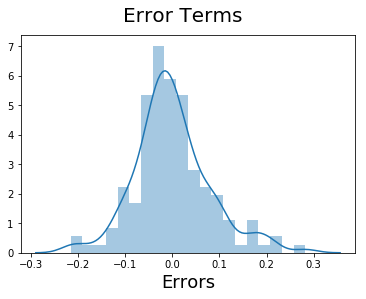

In [329]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((Y_train - Y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Thogh not a perfectly normal, but this is pretty close to a Normal Distribution. Hence this model abides by the property of Linear Model that says error terms are normally distributed

## Making Predictions

#### Applying the scaling on the test sets

In [330]:
cars_data_test[vars_to_transform] = scaler.transform(cars_data_test[vars_to_transform])
#help(scaler.transform)

#### Dividing into X_test and y_test

In [331]:
y_test = cars_data_test.pop('price')
X_test = cars_data_test

In [332]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [333]:
# Making predictions
y_pred = lm16.predict(X_test_new)

In [334]:
y_pred.head()

160    0.052469
186    0.125236
59     0.158353
165    0.149416
140    0.075043
dtype: float64

## Model Evaluation

Text(0,0.5,'y_pred')

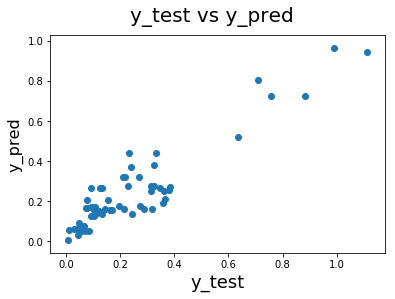

In [335]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

Not exactly, but we see somewhat constant variance
So this is a pretty good model to go further with

## Running the R-sqaured on the test set

When you're done with model building and residual analysis, and have made predictions on the test set, just make sure you use the following two lines of code to calculate the R-squared score on the test set.
 
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

In [336]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8525529106092413

## Conclusion

So we see that the features enginesize, fuelsystem, peakrpm, enginetype and carcompany are the top variables that control the price of the car with BMW and Porsche perhaps being the most expensive cars